In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [215]:
df =  sns.load_dataset('titanic', data_home='Datasets')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [237]:
#discarting same variables
df1 = df.drop(['embarked', 'class', 'alive'], axis=1)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


## exploratory data analysis

In [238]:
null = []
for i in df1.columns:
    x = df1[i].isnull().sum()
    null.append(x)

null

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [239]:
pd.DataFrame(null, index=df1.columns, columns=['Total Missing Values'])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

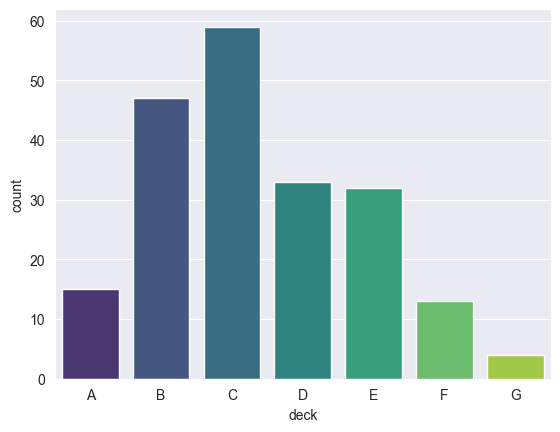

In [240]:
sns.set_style('darkgrid')
sns.countplot(x = df1.deck, data = df1, palette='viridis')

<Axes: xlabel='deck', ylabel='count'>

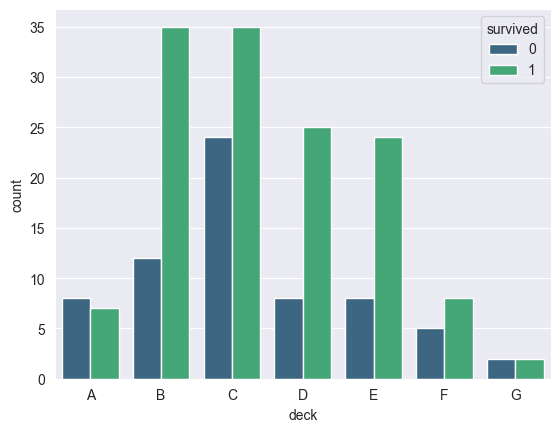

In [241]:
sns.set_style('darkgrid')
sns.countplot(x = df1.deck, hue=df1.survived, data = df1, palette='viridis')

In [242]:
df2 = df1.drop('deck', axis=1)
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

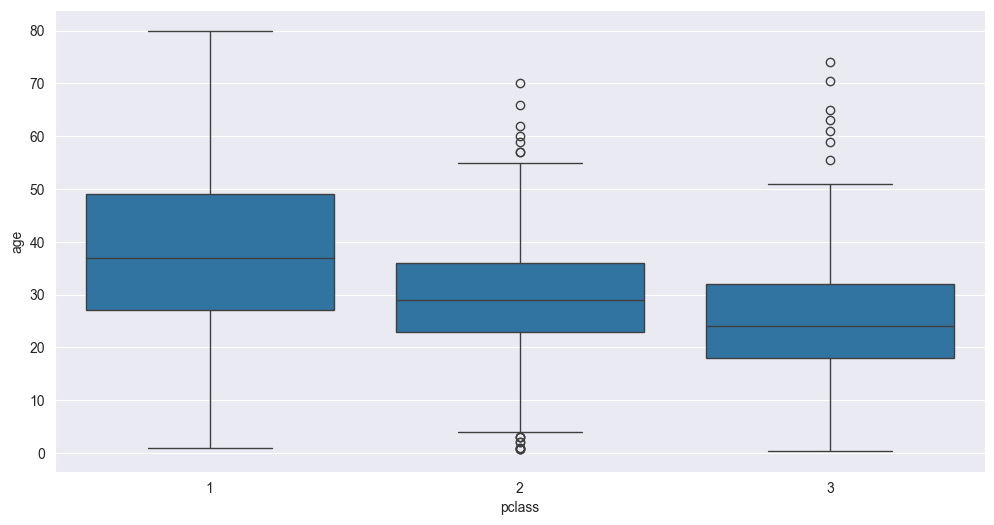

In [243]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='age', data=df2)

In [244]:
def fillna_age(column):
    age = column[0]
    pclass = column[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [245]:
df2.age = df2[['age', 'pclass']].apply(fillna_age, axis=1)

In [246]:
df2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [247]:
df3 = df2.dropna()
df3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

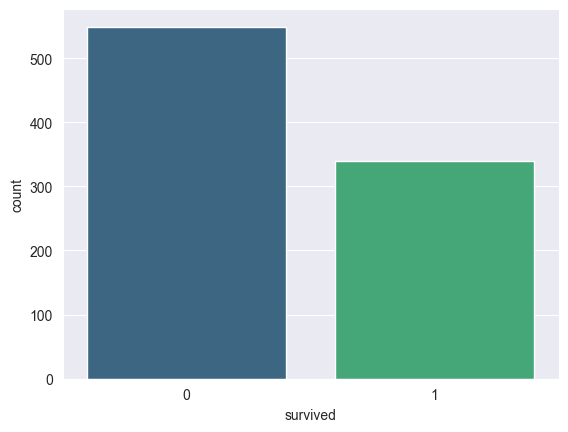

In [248]:
sns.set_style('darkgrid')
sns.countplot(x = df3.survived, data = df1, palette='viridis')

In [249]:
df3.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

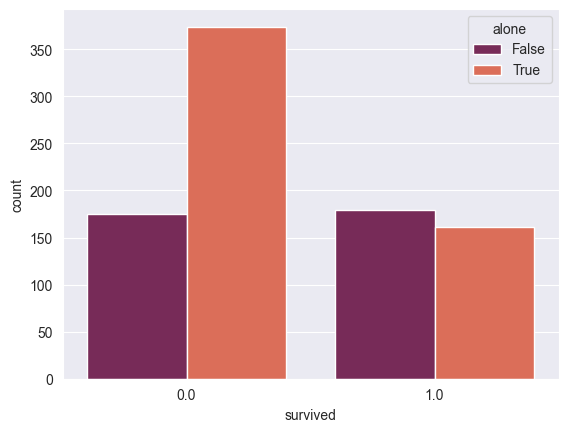

In [250]:
sns.set_style('darkgrid')
sns.countplot(x = df3.survived, hue='alone', data = df1, palette='rocket')

<Axes: xlabel='survived', ylabel='count'>

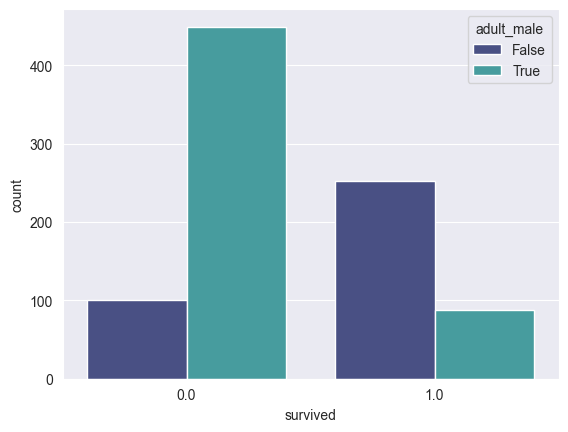

In [251]:
sns.set_style('darkgrid')
sns.countplot(x = df3.survived, hue='adult_male', data = df1, palette='mako')

<Axes: xlabel='survived', ylabel='count'>

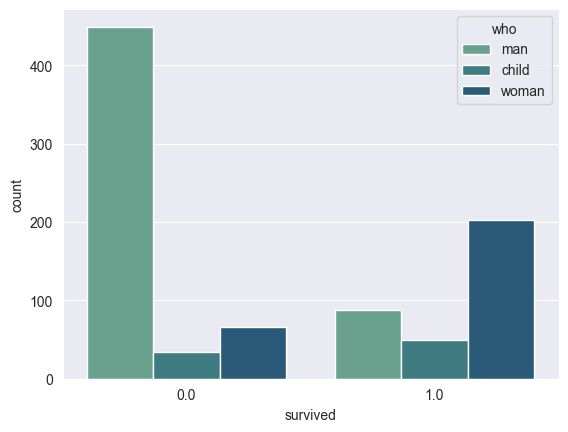

In [252]:
sns.set_style('darkgrid')
sns.countplot(x = df3.survived, hue='who', data = df1, palette='crest')

<Axes: xlabel='survived', ylabel='count'>

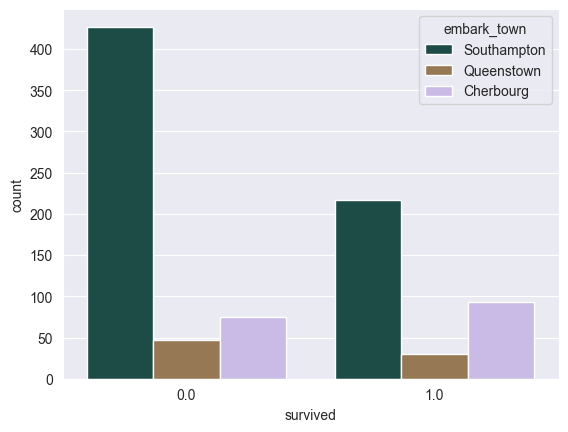

In [253]:
sns.set_style('darkgrid')
sns.countplot(x = df3.survived, hue='embark_town', data = df1, palette='cubehelix')

In [254]:
df3.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

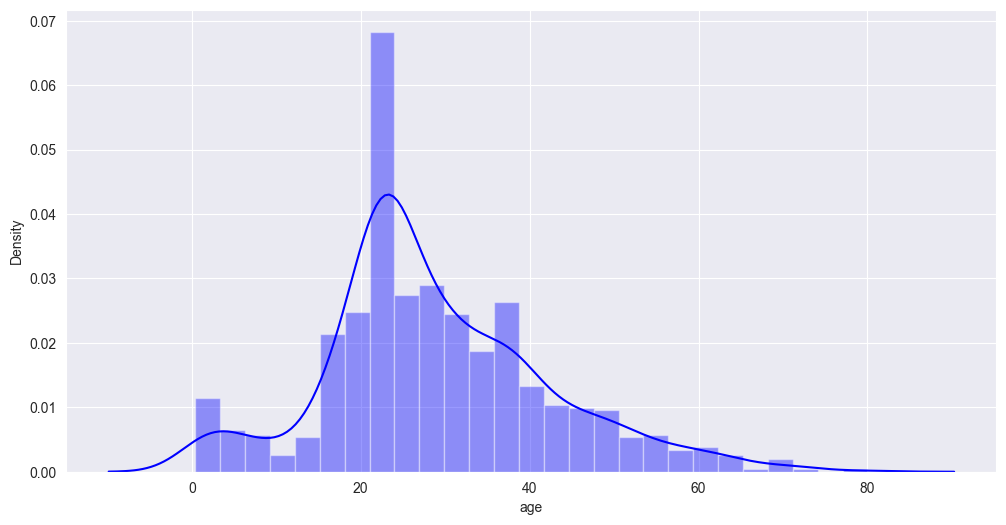

In [255]:
plt.figure(figsize = (12, 6))
sns.distplot(df3['age'], color='blue')

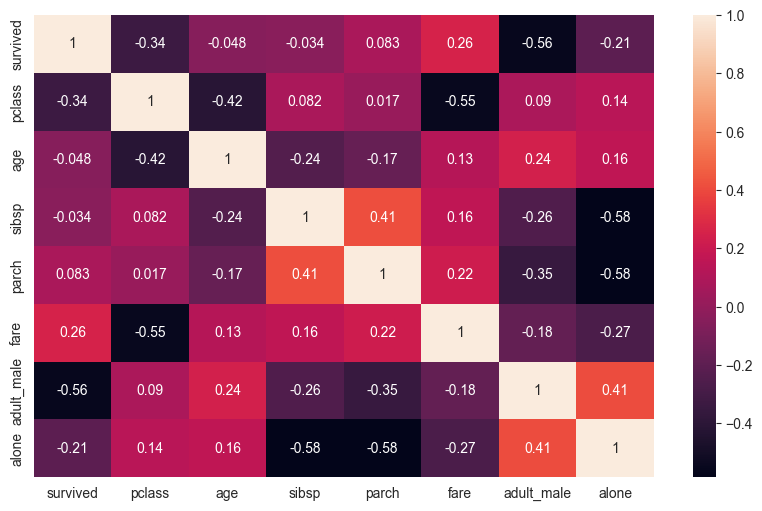

In [264]:
heatmap = df3.drop(['sex', 'who', 'embark_town'], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap.corr(), annot=True)
plt.show()

In [265]:
df4 = df3.drop(["age", "sibsp", "parch"], axis=1)
df4.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,1,Southampton,0
1,1,1,female,71.2833,woman,0,Cherbourg,0
2,1,3,female,7.9250,woman,0,Southampton,1
3,1,1,female,53.1000,woman,0,Southampton,0
4,0,3,male,8.0500,man,1,Southampton,1


In [266]:
df4['alone'] = df4['alone'].astype('int')
df4['adult_male'] = df4['adult_male'].astype('int')

sex = pd.get_dummies(df4['sex'], drop_first=True, dtype='int')
who = pd.get_dummies(df4['who'], drop_first=True, dtype='int')
embark_town = pd.get_dummies(df4['embark_town'], drop_first=True, dtype='int')

In [269]:
df5 = pd.concat([df4, sex, who, embark_town], axis=1)
df5.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,Queenstown,Southampton
0,0,3,male,7.2500,man,1,Southampton,0,1,1,0,0,1
1,1,1,female,71.2833,woman,0,Cherbourg,0,0,0,1,0,0
2,1,3,female,7.9250,woman,0,Southampton,1,0,0,1,0,1
3,1,1,female,53.1000,woman,0,Southampton,0,0,0,1,0,1
4,0,3,male,8.0500,man,1,Southampton,1,1,1,0,0,1


In [270]:
df6 = df5.drop(['sex', 'embark_town', 'who'], axis=1)
df6.head()

,survived,pclass,fare,adult_male,alone,male,man,woman,Queenstown,Southampton
0,0,3,7.2500,1,0,1,1,0,0,1
1,1,1,71.2833,0,0,0,0,1,0,0
2,1,3,7.9250,0,1,0,0,1,0,1
3,1,1,53.1000,0,0,0,0,1,0,1
4,0,3,8.0500,1,1,1,1,0,0,1


In [276]:
fdf = df6

## Modelling

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [279]:
X = fdf.drop(['survived'], axis=1)
y = fdf['survived']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [281]:
model = LogisticRegression()

In [282]:
model.fit(X_train, y_train)

LogisticRegression()

In [283]:
y_pred = model.predict(X_test)

In [289]:
from sklearn.metrics import classification_report, confusion_matrix

In [291]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       109
           1       0.72      0.81      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.81       178



In [292]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[87, 22],
       [13, 56]], dtype=int64)